In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import StratifiedKFold, cross_validate

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from scipy.stats import pearsonr, spearmanr
import pandas as pd






from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [18]:
# Replace 'your_file.csv' with the path to your CSV file
train_path = 'train.csv'
test_path = 'test.csv'

# Read the CSV file into a DataFrame
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

print(f"{train_data.columns}, Length = {len(train_data.columns)}")
data = train_data

Index(['UID', 'AgriculturalPostalZone', 'AgricultureZoningCode',
       'CropFieldConfiguration', 'CropSpeciesVariety', 'CultivatedAndWildArea',
       'CultivatedAreaSqft1', 'DistrictId', 'FarmClassification',
       'FarmEquipmentArea', 'FarmShedAreaSqft', 'FarmVehicleCount',
       'FarmingCommunityId', 'FarmingUnitCount', 'FieldConstructionType',
       'FieldEstablishedYear', 'FieldShadeCover', 'FieldSizeSqft',
       'FieldZoneLevel', 'HarvestProcessingType', 'HarvestStorageSqft',
       'HasGreenHouse', 'HasPestControl', 'LandUsageType', 'Latitude',
       'Longitude', 'MainIrrigationSystemCount', 'NationalRegionCode',
       'NaturalLakePresence', 'NumberGreenHouses', 'NumberOfFarmingZones',
       'OtherZoningCode', 'PartialIrrigationSystemCount',
       'PerimeterGuardPlantsArea', 'PrimaryCropAreaSqft',
       'PrimaryCropAreaSqft2', 'RawLocationId', 'ReservoirType',
       'ReservoirWithFilter', 'SoilFertilityType', 'StorageAndFacilityCount',
       'TaxAgrarianValue', 'TaxL

/tmp/ipykernel_123476/3396318441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=data, palette='Set2')


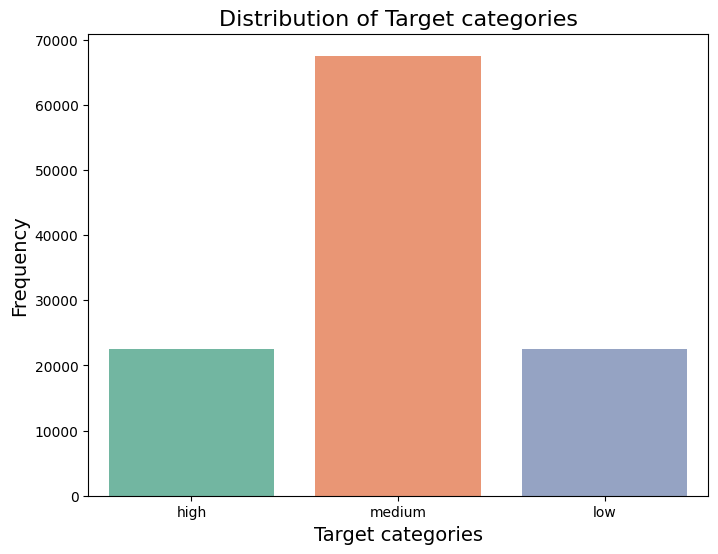

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' is the DataFrame containing your data and 'Target' is the column to be visualized
def plot_output_distribution(data, target_column='Target'):
    plt.figure(figsize=(8, 6))
    
    # Plot the distribution of categories in the target column using seaborn
    sns.countplot(x=target_column, data=data, palette='Set2')
    
    # Adding labels and title
    plt.title(f'Distribution of {target_column} categories', fontsize=16)
    plt.xlabel(f'{target_column} categories', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Show the plot
    plt.show()

# Call the function with your train_data
plot_output_distribution(train_data, target_column='Target')


/tmp/ipykernel_123476/671361057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


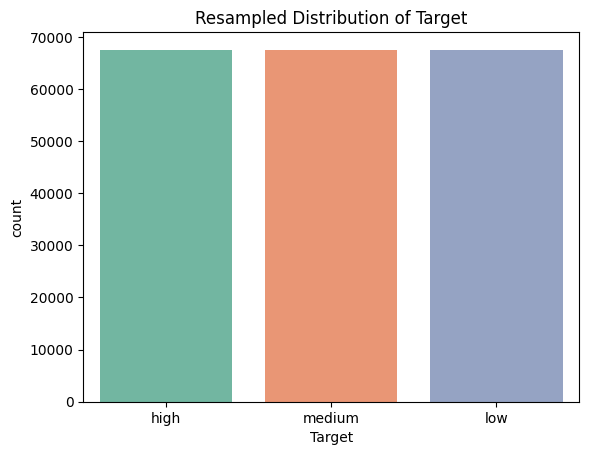

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Separate features and target
X = train_data.drop(columns=['Target'])
y = train_data['Target']

# Impute missing values with the mean (use other strategies like median or most_frequent if needed)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



# Check the distribution after resampling
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Resampled Distribution of Target')
plt.show()


In [ ]:
# Drop columns with more than a certain threshold of missing values
threshold = 0.9  # 80% missing values
threshold_count = int((1 - threshold) * len(data))
train_data = train_data.dropna(axis=1, thresh=threshold_count)

print(train_data.columns, len(train_data.columns))
oneHotEncoding = ['AgricultureZoningCode', 'CropSpeciesVariety', 'DistrictId', 'FarmingCommunityId', 'FieldEstablishedYear',
                   'HarvestProcessingType', 'LandUsageType', 'NationalRegionCode', 'SoilFertilityType', 'TownId', 'TypeOfIrrigationSystem', 
                   'ValuationYear', 'WaterAccessPoints']

Index(['UID', 'AgriculturalPostalZone', 'AgricultureZoningCode',
       'CropSpeciesVariety', 'CultivatedAreaSqft1', 'DistrictId',
       'FarmEquipmentArea', 'FarmVehicleCount', 'FarmingCommunityId',
       'FarmingUnitCount', 'FieldEstablishedYear', 'FieldSizeSqft',
       'HarvestProcessingType', 'LandUsageType', 'Latitude', 'Longitude',
       'MainIrrigationSystemCount', 'NationalRegionCode',
       'NaturalLakePresence', 'NumberGreenHouses', 'NumberOfFarmingZones',
       'OtherZoningCode', 'PartialIrrigationSystemCount', 'RawLocationId',
       'SoilFertilityType', 'StorageAndFacilityCount', 'TaxAgrarianValue',
       'TaxLandValue', 'TotalCultivatedAreaSqft', 'TotalTaxAssessed',
       'TotalValue', 'TownId', 'TypeOfIrrigationSystem', 'ValuationYear',
       'WaterAccessPoints', 'WaterAccessPointsCalc', 'WaterReservoirCount',
       'Target', 'target'],
      dtype='object') 39


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from feature_engine.selection import DropCorrelatedFeatures

# Split the data into features (X) and target (y)
X = train_data.drop(columns=['Target'])  # Drop the 'Target' column to get features
y = train_data['Target'].map({'low': 1, 'medium': 11, 'high': 21})

X['target'] = train_data['Target'].map({'low': 1, 'medium': 11, 'high': 21})

print("\nCorrelation Matrix:")
correlation_matrix = X.corr()
# print(correlation_matrix)
for col in X.columns:
    print(f"{col} : {correlation_matrix[col]['Target']}")
    
# Correct the imputation step with KNNImputer
def preprocess(data):
    """
    Preprocess the data by handling missing values and eliminating low-correlation features.
    
    Args:
    - data (DataFrame): The input DataFrame containing the feature columns.
    
    Returns:
    - data (DataFrame): The preprocessed DataFrame.
    """


    # numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    # # Step 2: Drop highly correlated features
    # corr_threshold = 0.8  # Set correlation threshold for feature elimination
    # selector = DropCorrelatedFeatures(threshold=corr_threshold, variables=numerical_features)
    # data = selector.fit_transform(data)
    # print(data.columns)


    # # Step 1: Handle missing values using KNNImputer
    # numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Convert to list
    # imputer = KNNImputer(n_neighbors=5)  # Set k (number of neighbors)
    # data[numerical_features] = imputer.fit_transform(data[numerical_features])
    

    oneHotEncoders = ['']
    
    return data

# Preprocess the data before splitting into train/test sets
X_processed = preprocess(X)


Correlation Matrix:


KeyError: 'Target'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from joblib import Parallel, delayed

# Define Random Forest hyperparameters
params = {
    'bootstrap': False,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100,
    'warm_start': True
}

# Initialize the RandomForestClassifier with the given parameters
rf_model = RandomForestClassifier(**params)

# Define the number of folds for cross-validation
n_folds = 5

# Define the function to train and validate the model for each fold
def train_and_evaluate(fold, X, y):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    
    # Calculate and return the Macro F1 score for this fold
    return f1_score(y_test, y_pred, average='macro')

# Use joblib to parallelize the cross-validation process
cv_f1_scores = Parallel(n_jobs=-1)(delayed(train_and_evaluate)(fold, X, y) for fold in range(n_folds))

# Print the Macro F1 score for each fold, the mean, and the standard deviation
mean_f1 = np.mean(cv_f1_scores)
std_f1 = np.std(cv_f1_scores)

print(f"Macro F1 score for each fold: {cv_f1_scores}")
print(f"Mean Macro F1 score: {mean_f1:.4f}")
print(f"Standard Deviation of Macro F1 score: {std_f1:.4f}")


Macro F1 score for each fold: [0.3494352997893528, 0.3471244471940298, 0.3490552237093247, 0.34938596301515146, 0.35036045543777844]
Mean Macro F1 score: 0.3491
Standard Deviation of Macro F1 score: 0.0011


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

# Identify categorical features in the input (except the target column)
cat_features = [col for col in X.columns if X[col].dtype == 'object']


# Initialize the CatBoostClassifier
model = CatBoostClassifier(cat_features=cat_features, verbose=200, random_state=42)

# Set up the dataset as a Pool
train_data_pool = Pool(X_train, label=y_train, cat_features=cat_features)

# Perform cross-validation
cv_results = cv(
    train_data_pool,
    iterations=500,          # Number of trees
    depth=10,                # Depth of the tree
    learning_rate=0.01,      # Learning rate
    l2_leaf_reg=3,           # L2 regularization
    fold_count=10,           # 10-fold Cross-Validation
    shuffle=True,            # Shuffle data before splitting into folds
    stratified=True,         # Stratify by target to preserve class distribution
    metrics=['F1'],          # Metric for evaluation
    early_stopping_rounds=50,
    verbose=True
)

# Calculate the average of F1 scores from cross-validation
mean_f1_score = np.mean(cv_results['test-F1-mean'])
print(f"Average Macro F1 Score from Cross-Validation: {mean_f1_score}")